In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from chardet.universaldetector import UniversalDetector
import pymannkendall as mk

In [35]:
inputfile = '../input/input.csv'

In [36]:
# 文字コードの判別
# https://zenn.dev/takedato/articles/c3a491546f8c58 
with open(inputfile, 'rb') as f:  
  detector = UniversalDetector()
  for line in f:
    detector.feed(line)
    if detector.done:
      break
  detector.close()
  result = detector.result
  code = result['encoding']
  print(code)

UTF-8-SIG


In [37]:
if code == 'utf-8':
    code = 'utf-8'
elif code == 'UTF-8-SIG':
    code = 'utf-8'
else:
    code = 'shift-jis'
print(code)

# df = pd.read_csv(inputfile, index_col=0)
df = pd.read_csv(inputfile, index_col=0, encoding=code)
# df = pd.read_csv(inputfile, index_col=0, encoding="UTF-8")
df

utf-8


,札幌,Asahikawa,Kushiro,Obihiro,Hakodate,Abashiri
1910,11.6,7.1,19.2,19.3,25.6,3.5
1911,6.4,25.9,32.3,33.2,10.4,50.6
1912,24.4,8.0,18.2,36.7,8.5,56.1
1913,12.2,7.8,8.7,6.3,11.7,27.4
1914,43.0,7.5,10.5,22.7,59.2,32.8
...,...,...,...,...,...,...
2018,12.0,11.0,3.5,8.0,30.5,NaN
2019,15.0,9.0,7.5,4.5,11.0,NaN
2020,14.0,9.0,20.5,21.5,14.0,NaN
2021,12.5,11.0,17.0,15.5,19.0,NaN


In [38]:
np.array(df.index)

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

In [39]:
indexls = df.columns
b = np.array(df.columns)
num = b.shape[0] # 要素数取得
num

6

In [40]:
columnsls = ["trend", "h", "p", "z", "Tau", "s", "var_s", "slope", "intercept","r","R2"]

In [41]:
# matplotlibの設定

plt.rcParams['font.size'] = 15
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 0.2

plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = True # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 3.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.6     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.6     # y軸副目盛り線の線幅

plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'

In [42]:
def graph1(i):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.hist(df.iloc[:,i], color='black', bins=30)
    ax.set_title(f'{df.columns[i]}', fontname ='MS Gothic')
    ax.set_xlabel('x')
    ax.set_ylabel('Frequency')
    fig.savefig(f'../result/jpg/histogram_{df.columns[i]}.jpg')
    fig.savefig(f'../result/png/histogram_{df.columns[i]}.png')
    fig.savefig(f'../result/svg/histogram_{df.columns[i]}.svg')
    fig.show()

In [43]:
df.iloc[:,5]

1910     3.5
1911    50.6
1912    56.1
1913    27.4
1914    32.8
        ... 
2018     NaN
2019     NaN
2020     NaN
2021     NaN
2022     NaN
Name: Abashiri, Length: 113, dtype: float64

In [44]:
df_corr = df.iloc[:,5]
df_corr = df_corr.rename_axis('year').reset_index()
df_corr

,year,Abashiri
0,1910,3.5
1,1911,50.6
2,1912,56.1
3,1913,27.4
4,1914,32.8
...,...,...
108,2018,NaN
109,2019,NaN
110,2020,NaN
111,2021,NaN


In [45]:
df_corr.corr()

,year,Abashiri
year,1.000000,-0.283869
Abashiri,-0.283869,1.000000


In [46]:
mk.original_test(df.iloc[:,5])

Mann_Kendall_Test(trend='decreasing', h=True, p=0.012382810102920638, z=-2.5010431186711966, Tau=-0.16477987421383647, s=-917.0, var_s=134137.0, slope=-0.07058823529411766, intercept=18.555882352941175)

In [47]:
def graph2(i):
    #figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
    fig = plt.figure(figsize=(6.4,6), dpi=120, facecolor='w')

    #add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
    ax1 = fig.add_subplot(1, 1, 1)

    ax1.set_position([0.1, 0.6, 0.8, 0.3]) #ax.set_position([枠の左辺, 枠の下辺, 枠の横幅, 枠の高さ])
    #plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # ax1.plot(df.index, df.iloc[:,3], c='black')

    ax1.plot(df.index, df.iloc[:,i],color="black",linewidth=1,marker=".",markersize=8)
    sns.regplot(x=df.index, y=df.iloc[:,i],color="black",ci=95, ax=ax1, marker="None",line_kws={"linewidth": 1.5})
    ax1.set_title(f'{df.columns[i]}', fontname ='MS Gothic')
    # ax1.set_xlabel('x')
    ax1.set_ylabel('')
    fig.savefig(f'../result/jpg/transition_{df.columns[i]}.jpg')
    fig.savefig(f'../result/png/transition_{df.columns[i]}.png')
    fig.savefig(f'../result/svg/transition_{df.columns[i]}.svg')

In [48]:
def main():
    result = pd.DataFrame(np.zeros((num, 11)),
                        columns = columnsls,
                        index = indexls)

    for i in range(num):
        trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(df.iloc[:,i])
        df_corr = df.iloc[:,i]
        df_corr = df_corr.rename_axis('year').reset_index()
        r = (df_corr.corr()).iloc[0,1]
        r2 = r*r
        resultls = [trend, h, p, z, Tau, s, var_s, slope, intercept, r, r2]
        result.iloc[i,:] = resultls

        graph1(i)
        graph2(i)
    return(result)

C:\Users\seppyo-kagaku_5\AppData\Local\Temp\ipykernel_23300\1921794299.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\seppyo-kagaku_5\AppData\Local\Temp\ipykernel_23300\1921794299.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\seppyo-kagaku_5\AppData\Local\Temp\ipykernel_23300\1921794299.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\seppyo-kagaku_5\AppData\Local\Temp\ipykernel_23300\1921794299.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\seppyo-kagaku_5\AppData\Local\Temp\ipykernel_23300\1921794299.p

,trend,h,p,z,Tau,s,var_s,slope,intercept,r,R2
札幌,no trend,False,0.178590,-1.345109,-0.085809,-543.0,162361.666667,-0.031371,20.356768,-0.177911,0.031652
Asahikawa,decreasing,True,0.027331,-2.206755,-0.140645,-890.0,162291.333333,-0.026394,12.478084,-0.202872,0.041157
Kushiro,no trend,False,0.642595,-0.464074,-0.029709,-188.0,162371.333333,-0.015266,17.854896,-0.089885,0.008079
Obihiro,no trend,False,0.974265,0.032260,0.002212,14.0,162387.333333,0.000000,13.500000,-0.024545,0.000602
Hakodate,no trend,False,0.964369,0.044672,0.003003,19.0,162358.333333,0.000000,14.000000,-0.007925,0.000063
Abashiri,decreasing,True,0.012383,-2.501043,-0.164780,-917.0,134137.000000,-0.070588,18.555882,-0.283869,0.080581


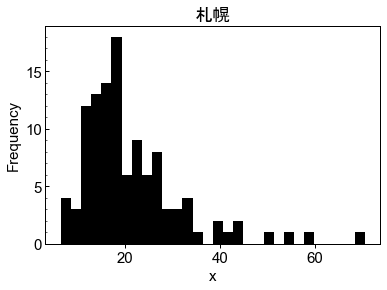

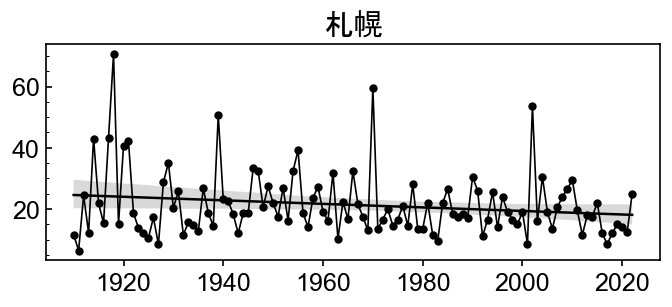

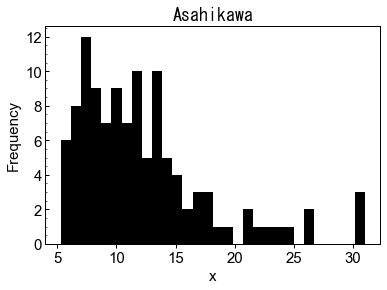

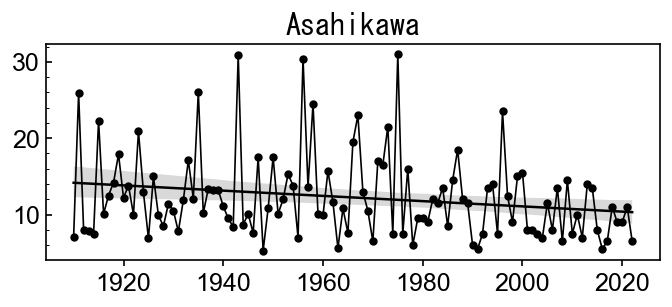

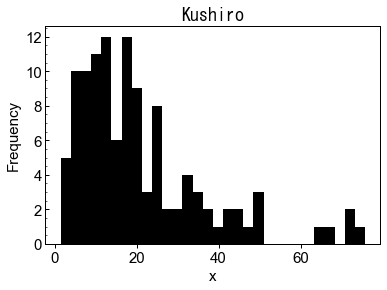

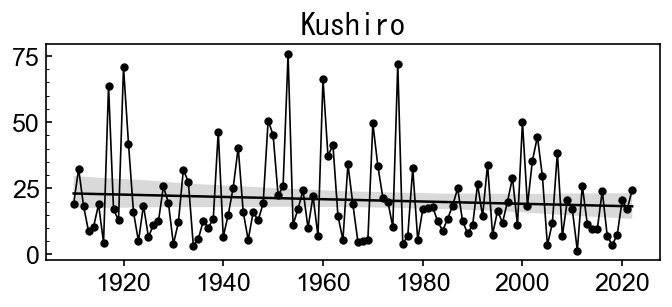

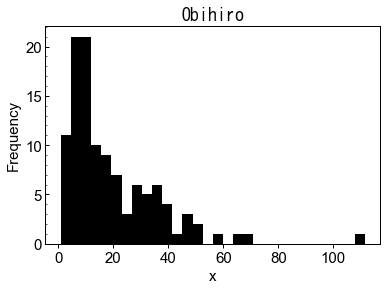

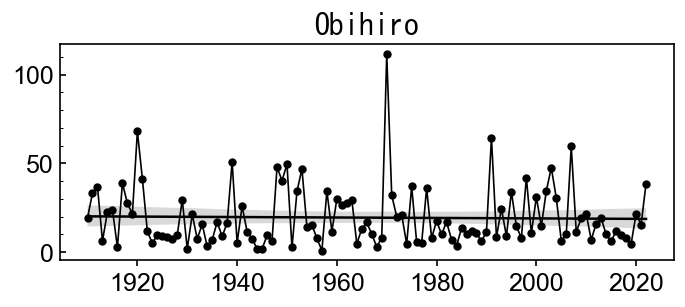

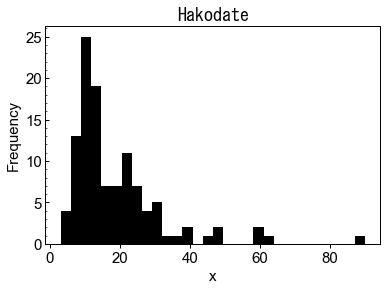

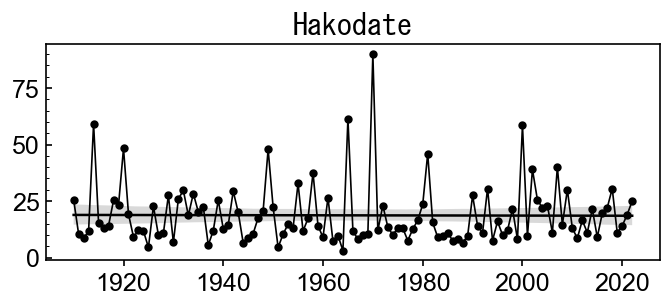

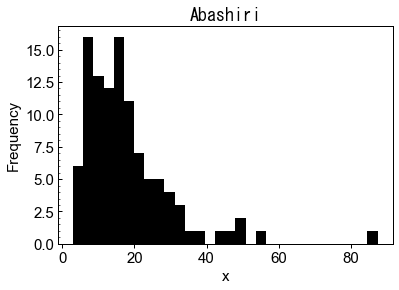

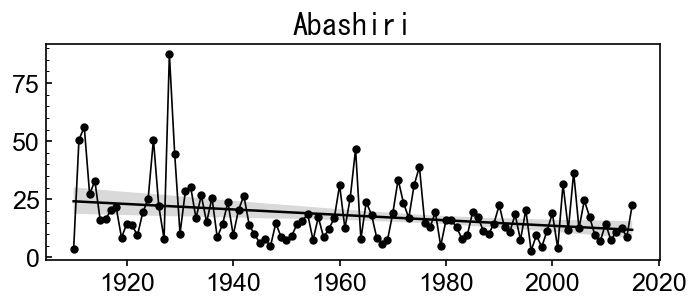

In [49]:
df_result = main()
df_result

In [50]:
df_result.to_csv('../result/result.csv', encoding="shift jis")